Output()

Output()

Intervalul HDI 95% pentru mu: 56.33 - 59.43
Intervalul HDI 95% pentru sigma: 1.29 - 3.66


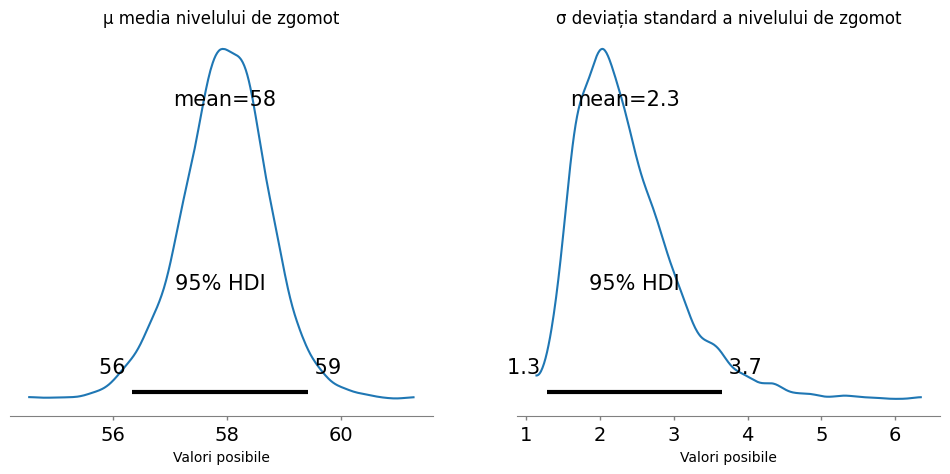

In [8]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

observed_noise = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

with pm.Model() as model:
    mu = pm.Normal("mu", mu=58, sigma=100)
    sigma = pm.HalfNormal("sigma", sigma=10)

    noises = pm.Normal("noises", mu=mu, sigma=sigma, observed=observed_noise)

    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

mu_hdi = pm.hdi(trace, hdi_prob=0.95)["mu"]
sigma_hdi = pm.hdi(trace, hdi_prob=0.95)["sigma"]

print(f"Intervalul HDI 95% pentru mu: {mu_hdi[0]:.2f} - {mu_hdi[1]:.2f}")
print(f"Intervalul HDI 95% pentru sigma: {sigma_hdi[0]:.2f} - {sigma_hdi[1]:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
az.plot_posterior(trace, var_names=["mu", "sigma"], hdi_prob=0.95, ax=axes)

axes[0].set_title("μ media nivelului de zgomot")
axes[0].set_xlabel("Valori posibile")
axes[1].set_title("σ deviația standard a nivelului de zgomot")
axes[1].set_xlabel("Valori posibile")
plt.show()